In [651]:
import pandas as pd
import numpy as np

from scipy.stats import zscore
#from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
import seaborn as sns
#from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
#from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import MaxAbsScaler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
from scipy.stats import rankdata
#import lightgbm as lgb
from sklearn import metrics
import gc
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import itertools
from sklearn import metrics
from scipy.stats import norm, rankdata
#from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from scipy.stats import rankdata
pd.set_option('display.max_columns', 200)
# below is to have multiple outputs from same Jupyter cells
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
warnings.filterwarnings('ignore')
#from feature_selector import FeatureSelector
from sklearn.linear_model import SGDRegressor,LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [652]:
train_org=pd.read_csv("train_v9rqX0R.csv")
test_org=pd.read_csv("test_AbJTz2l.csv")
train=train_org.copy()
test=test_org.copy()
label_col='Item_Outlet_Sales'
ntest=test.shape[1]
print(train.shape,test.shape)


(8523, 12) (5681, 11)


In [653]:
ntrain=train.shape[0]
ntrain

8523

In [654]:
#merging both test and train
train_test=pd.concat([train_org,test_org],ignore_index=True)

In [655]:
train_test.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [656]:
categorical_columns=[x for x in train_test.dtypes.index if train_test.dtypes[x]=='object']
categorical_columns

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

<AxesSubplot:>

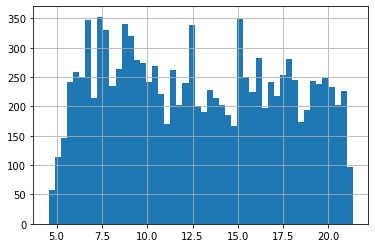

In [657]:
train_test.Item_Weight.hist(bins=50)

<AxesSubplot:>

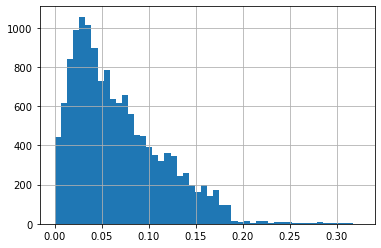

In [658]:
data.Item_Visibility.hist(bins=50)  ## right skewed

In [659]:
train_test['Item_visibility_sqrt'] = np.sqrt(train_test['Item_Visibility'])

<AxesSubplot:>

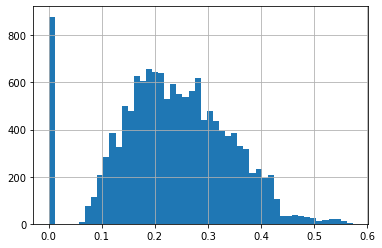

In [660]:
train_test.Item_visibility_sqrt.hist(bins=50)  # perfect #bell shape

<AxesSubplot:>

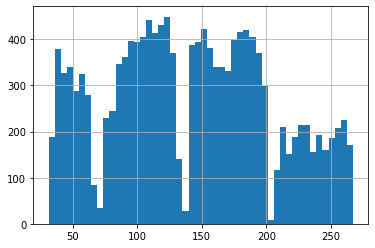

In [661]:
train_test.Item_MRP.hist(bins=50)  #looks like uniform

In [662]:
train_test['MRP_lognorm'] = np.log(train_test['Item_MRP'])

<AxesSubplot:>

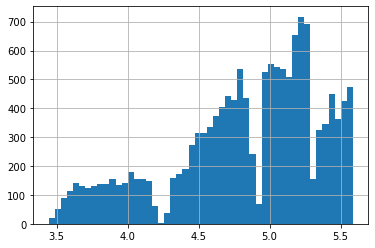

In [663]:
train_test.MRP_lognorm.hist(bins=50)  #left skewed??

In [664]:
train_test['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [665]:
# Mapping
train_test['Item_Fat_Content'] = train_test['Item_Fat_Content'].replace({'LF': 1,
                                                                         'Low Fat':1,
                                                                         'low fat':1,
                                                                         'reg':2,
                                                                         'Regular':2})


Modified Categories for : Item_Fat_Content


In [579]:
import seaborn as sns

In [580]:
#outliers
train_test.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Item_visibility_sqrt            0
MRP_lognorm                     0
dtype: int64

## Missing value Treatmet for categorical values (mode Insertion)

In [581]:
train.groupby(['Outlet_Identifier'])['Outlet_Type'].agg(pd.Series.mode)#.mode(np.mode())

Outlet_Identifier
OUT010        Grocery Store
OUT013    Supermarket Type1
OUT017    Supermarket Type1
OUT018    Supermarket Type2
OUT019        Grocery Store
OUT027    Supermarket Type3
OUT035    Supermarket Type1
OUT045    Supermarket Type1
OUT046    Supermarket Type1
OUT049    Supermarket Type1
Name: Outlet_Type, dtype: object

In [582]:
train[train['Outlet_Size'].isna()]['Outlet_Location_Type'].value_counts()

Tier 2    1855
Tier 3     555
Name: Outlet_Location_Type, dtype: int64

In [583]:
train.groupby(['Outlet_Location_Type'])['Outlet_Size'].agg(pd.Series.mode)

Outlet_Location_Type
Tier 1     Small
Tier 2     Small
Tier 3    Medium
Name: Outlet_Size, dtype: object

In [584]:
train_test[train_test['Outlet_Size'].isna()].groupby(['Outlet_Identifier'])['Outlet_Location_Type'].agg(pd.Series.mode)

Outlet_Identifier
OUT010    Tier 3
OUT017    Tier 2
OUT045    Tier 2
Name: Outlet_Location_Type, dtype: object

In [585]:
train_test.groupby(['Outlet_Location_Type'])['Outlet_Type'].agg(pd.Series.mode)#.mode(np.mode())

Outlet_Location_Type
Tier 1    Supermarket Type1
Tier 2    Supermarket Type1
Tier 3    Supermarket Type3
Name: Outlet_Type, dtype: object

In [586]:
train_test.groupby(['Outlet_Type'])['Outlet_Size'].agg(pd.Series.mode)#.mode(np.mode())

Outlet_Type
Grocery Store         Small
Supermarket Type1     Small
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object

In [587]:
index=(train_test['Outlet_Size'].isna())
train_test.loc[index & (train_test['Outlet_Identifier']=='OUT010') & (train_test['Outlet_Type']=='Grocery Store'),'Outlet_Size']='Small'
train_test.loc[index & (train_test['Outlet_Identifier']=='OUT045') & (train_test['Outlet_Type']=='Supermarket Type1'),'Outlet_Size']='Medium'
train_test.loc[index & (train_test['Outlet_Identifier']=='OUT017') & (train_test['Outlet_Type']=='Supermarket Type1'),'Outlet_Size']='Small'

In [588]:
#Mapping
train_test['Outlet_Size']=train_test['Outlet_Size'].replace({'Small':1,
                                                            'Medium':2,
                                                            'High':3})

In [589]:
#cond=(train_test['Item_Weight'].isna())
#train_test.loc[cond,'Item_Weight']
#map1=dict(train_test.groupby(['Item_Identifier'])['Item_Weight'].median())
#map1
#pd.pivot_table('Item_Weight',index='Item_Identifier',aggfunc=np.mean())
#train_test.loc[cond,'Item_Weight']=train_test.loc[cond,'Item_Identifier'].apply(lambda x :map1[x] )

### replacing Item_Weight with median

In [590]:
train_test["Item_Weight"].fillna(train_test.groupby(["Item_Identifier"])["Item_Weight"].transform("median"), inplace=True)

In [591]:
train_test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Item_visibility_sqrt            0
MRP_lognorm                     0
dtype: int64

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

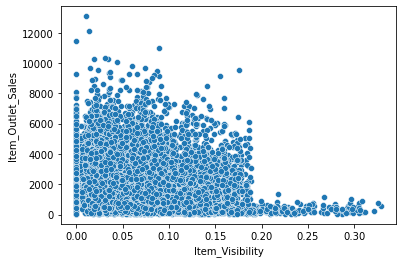

In [592]:
import seaborn as sns
sns.scatterplot(x='Item_Visibility',y=label_col,data=train)   ## outlier after .2

In [593]:
train[train['Item_Visibility']<1.9].head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [594]:
itemID_vis_Map=dict(train_test[train_test['Item_Visibility']<1.9].groupby(['Item_Identifier'])['Item_Visibility'].mean().round(6))
#itemID_vis_Map

In [595]:
train.loc[train['Item_Visibility']>0.19,'Item_Visibility'].shape
train_test[:ntrain].loc[train_test[:ntrain]['Item_Visibility']>0.190,'Item_Visibility']=train_test[:ntrain].loc[train_test[:ntrain]['Item_Visibility']>0.190]['Item_Identifier'].apply(lambda x:itemID_vis_Map[x])

(160,)

In [596]:
train_test[:ntrain].loc[train_test[:ntrain]['Item_Visibility']==0,'Item_Visibility']=train_test[:ntrain].loc[train_test[:ntrain]['Item_Visibility']==0]['Item_Identifier'].apply(lambda x:itemID_vis_Map[x])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

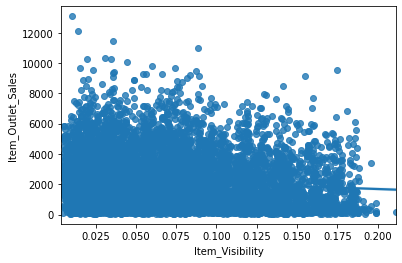

In [597]:
sns.regplot(x='Item_Visibility',y=label_col,data=train_test[:ntrain])

In [598]:
train_test[:ntrain].loc[train_test['Item_Visibility']>0.19,'Item_Visibility']

521     0.191440
854     0.195679
1805    0.198856
2586    0.192577
2677    0.195679
2855    0.211315
3474    0.199054
4382    0.190825
4674    0.191354
5031    0.191354
5150    0.198975
5734    0.195575
6674    0.199054
7388    0.192273
8273    0.194127
Name: Item_Visibility, dtype: float64

In [599]:
ouliers_items=train_test[:ntrain].loc[train_test['Item_Visibility']>0.19,'Item_Identifier']
#.value_counts()

In [600]:
newItemVisiMap=dict(train_test[:ntrain][train_test[:ntrain]['Item_Identifier'].isin(ouliers_items)].groupby('Item_Identifier')['Item_Visibility'].mean().round(5))

In [601]:
ouliers_items_idx=train_test[:ntrain].loc[train_test['Item_Visibility']>0.19,'Item_Identifier'].index
ouliers_items_idx

Int64Index([ 521,  854, 1805, 2586, 2677, 2855, 3474, 4382, 4674, 5031, 5150,
            5734, 6674, 7388, 8273],
           dtype='int64')

In [602]:
train_test.loc[ouliers_items_idx,'Item_Visibility']=train_test.loc[ouliers_items_idx]['Item_Identifier'].apply(lambda x:newItemVisiMap[x])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

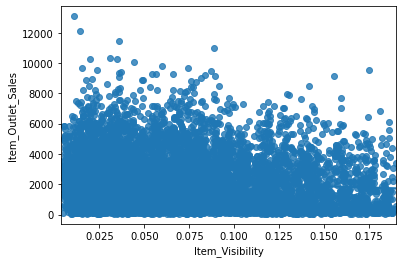

In [603]:
sns.regplot(x='Item_Visibility',y=label_col,data=train_test[:ntrain])   #perfect

# Feature engineering

In [666]:
train_test['Item_MRP_+_Visi']=train_test['Item_MRP'] + train_test['Item_Visibility']
train_test['Item_MRP_X_Visi']=train_test['Item_MRP'] * train_test['Item_Visibility']

In [607]:
train_test['Outlet_Age']= train_test['Outlet_Establishment_Year'] - (train_test['Outlet_Establishment_Year'].min()-1)

In [608]:
train_test['Fat_Con_+_Weight']=train_test['Item_Fat_Content']+train_test['Item_Weight']
train_test['Fat_Con_X_Weight']=train_test['Item_Fat_Content']*train_test['Item_Weight']

In [609]:
train['Item_Category'] = train['Item_Identifier'].apply(lambda x: x[0:2]).map({'FD':'Food',
                                                              'NC':'Non-Consumable',
                                                              'DR':'Drinks'})
test['Item_Category'] = test['Item_Identifier'].apply(lambda x: x[0:2]).map({'FD':'Food',
                                                              'NC':'Non-Consumable',
                                                              'DR':'Drinks'})
train_test['Item_Category'] = train_test['Item_Identifier'].apply(lambda x: x[0:2]).map({'FD':'Food',
                                                              'NC':'Non-Consumable',
                                                              'DR':'Drinks'})

In [610]:
Outlet_cols=[label_col,'Item_MRP','Item_Visibility','Item_Weight']
#df=train_test[:ntrain][Outlet_cols]
train_test['Total_Points']=df['Item_MRP']*df['Item_Visibility']*df['Item_Weight']

In [611]:
test.groupby('Outlet_Type')['Item_Visibility'].mean()

Outlet_Type
Grocery Store        0.104197
Supermarket Type1    0.059873
Supermarket Type2    0.058417
Supermarket Type3    0.062934
Name: Item_Visibility, dtype: float64

In [612]:
test.groupby('Outlet_Identifier')['Item_Visibility'].mean()

Outlet_Identifier
OUT010    0.102661
OUT013    0.060669
OUT017    0.060790
OUT018    0.058417
OUT019    0.105811
OUT027    0.062934
OUT035    0.060170
OUT045    0.061557
OUT046    0.059764
OUT049    0.056292
Name: Item_Visibility, dtype: float64

In [613]:
order=train_test.groupby('Outlet_Location_Type')['Item_Visibility'].mean().sort_values(ascending=False).index
map1=dict([i for i in zip(order,range(1,len(order)+1))]) 
map1=dict(train_test.groupby('Outlet_Location_Type')['Item_Visibility'].mean())
train_test['Outlet_location_type_wiseVisibility']=train_test['Outlet_Location_Type'].apply(lambda x : map1[x])

In [614]:
#map1=dict(train_test.groupby('Outlet_Location_Type')['Item_Visibility'].mean())
map1

{'Tier 1': 0.0704798335763818,
 'Tier 2': 0.06310753068670548,
 'Tier 3': 0.06817226267633882}

In [522]:
#map1

In [428]:
#train_test['Outlet_location_type_wiseVisibility']=train_test['Outlet_Location_Type'].map(map1)

In [615]:
order=train_test.groupby('Outlet_Identifier')['Item_Visibility'].mean().sort_values(ascending=True).index
map1=dict([i for i in zip(order,range(1,len(order)+1))]) 
map1=dict(train_test.groupby('Outlet_Identifier')['Item_Visibility'].mean())
train_test['Outlet_Identifier_wiseVisibility']=train_test['Outlet_Identifier'].apply(lambda x : map1[x])

In [616]:
order=train_test.groupby('Outlet_Type')['Item_Visibility'].mean().sort_values(ascending=True).index
map1=dict([i for i in zip(order,range(1,len(order)+1))]) 
map1=dict(train_test.groupby('Outlet_Type')['Item_Visibility'].mean())
train_test['Outlet_Type_wiseVisibility']=train_test['Outlet_Type'].apply(lambda x : map1[x])

In [617]:
order=train.groupby(['Outlet_Identifier'])['Item_Outlet_Sales'].mean().sort_values(ascending=True).index
map1=dict([i for i in zip(order,range(1,len(order)+1))])
map1=dict(train_test.groupby('Outlet_Identifier')['Item_Visibility'].mean())
train_test['Outlet_Ranking']=train_test['Outlet_Identifier'].apply(lambda x : map1[x])

In [619]:
train_test['Total_Points']=train_test['Item_MRP']*train_test['Item_Visibility']*train_test['Item_Weight']
train_test['Item_MRP_+_Weight']=train_test['Item_MRP'] + train_test['Item_Weight']
train_test['Item_MRP_+_Visi']=train_test['Item_MRP'] + train_test['Item_Visibility']

In [620]:
train_test['CPO']=train_test['Item_MRP']/train_test['Outlet_Size']

### Making Dummies

In [622]:
#dummies
data=train_test.copy()

In [623]:
data.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],1,inplace=True)

In [624]:
def one_hot(df, cols):
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
    return df

In [625]:
#data 
c=['Item_Type' , 'Outlet_Location_Type' , 'Outlet_Type', 'Item_Category']

In [626]:
data1=one_hot(data,c)

In [627]:
data1.drop(c,1,inplace=True)

In [628]:
data1.columns
features=['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size','Outlet_Age',
       'Outlet_location_type_wiseVisibility',
       'Outlet_Identifier_wiseVisibility','Item_visibility_sqrt']

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Item_Outlet_Sales', 'Item_visibility_sqrt',
       'MRP_lognorm', 'Outlet_Age', 'Fat_Con_+_Weight', 'Fat_Con_X_Weight',
       'Total_Points', 'Outlet_location_type_wiseVisibility',
       'Outlet_Identifier_wiseVisibility', 'Outlet_Type_wiseVisibility',
       'Outlet_Ranking', 'Item_MRP_+_Weight', 'Item_MRP_+_Visi', 'MrpPerUnit',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       

In [629]:
def add_feature_df(df,features):
    # count +ve and -ve
    df['count+'] = np.array(df>0).sum(axis=1)
    df['count-'] = np.array(df<0).sum(axis=1)
    #sum
    #df['sum_outside'] = df.sum(axis=1)
        
    for feature in features:
        #normalize
        df[feature+'_norm'] = (df[feature] - df[feature].mean())/df[feature].std()*(df[feature] - df[feature].mean())/df[feature].std()
        #percentage change row wise
        #df[feature+"_pct"] = df[feature].pct_change() # didnt give boost
        #diff change row wise
        #df[feature+"_diff"] = df[feature].diff() # didnt give boost
        # Square
        df[feature+'^2'] = df[feature] * df[feature]
        # Cube
        df[feature+'^3'] = df[feature] * df[feature] * df[feature]
        # 4th power
        #df[feature+'^4'] = df[feature] * df[feature] * df[feature] * df[feature]
        # Cumulative percentile (not normalized)
        df[feature+'_cp'] = rankdata(df[feature]).astype('float32')
        # Cumulative normal percentile, probabilites
        df[feature+'_cnp'] = norm.cdf(df[feature]).astype('float32')*norm.cdf(df[feature]).astype('float32')
        # sqrt
        df[feature+'_sqrt'] = np.sqrt(df[feature])
        #binning
        #bins = np.nanpercentile(df[feature], range(0,101,10))
        #df[feature+"_binned"] = pd.cut(df[feature],bins=bins)
        #rounding
        #df[feature+'_r2'] = np.round(df[feature], 2)
        #rounding
        #df['r1_'+feature] = np.round(df[feature], 1)
        #exp
        df['exp_'+feature] = np.exp(df[feature])
        #exp and feature
        df['xintoexp_'+feature] = np.exp(df[feature])*df[feature]
        #sum
        df['sum_inside'] = df[[feature]].sum(axis=1)
        #max
        df['max'] = df[[feature]].max(axis=1)
        #min
        df['min'] = df[[feature]].min(axis=1)
        #max
        #df['std'] = df[[feature]].std(axis=1)
        #skew
        #df['skew'] = df[[feature]].skew(axis=1)*df[[feature]].skew(axis=1)
        #kurt
        #df['kurt'] = df[[feature]].kurtosis(axis=1)
        #median
        df['med'] = df[[feature]].median(axis=1)
        #tanh
        df['tanh_'+feature] = np.tanh(df[feature])
        
    return df

In [630]:
data2=add_feature_df(data1,features)

In [631]:
#data2
data2=data2.round(3)

In [540]:
#data2.to_excel("check.xlsx")

In [632]:
# any nulls?
pd.DataFrame(data2.isnull().sum())[pd.DataFrame(data2.isnull().sum())[0]>0]

,0
Item_Outlet_Sales,5681


In [542]:
#data2

In [633]:
#test+train main
xtrain=data2[:ntrain].drop(label_col,1)
ytrain=data2[:ntrain][label_col]
xtest=data2[ntrain:].drop(label_col,1)
ytest=data2[ntrain:][label_col]

In [634]:
# scalling 

In [635]:
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()
scaler2=MinMaxScaler()
s1=scaler1.fit(data2.drop(label_col,1))
#s2=scaler2.fit(pd.DataFrame(ytrain))

In [636]:
#scaler.inverse_transform(scaled_data)

xtrain=s1.transform(xtrain)
xtest=s1.transform(xtest)
#ytrain=s2.transform(pd.DataFrame(ytrain))
#ytest=s2.transform(pd.DataFrame(ytest))

In [637]:
#Validating #spliting train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xtrain,ytrain, test_size=0.25, random_state=55)

In [638]:
X_train.shape

(6392, 131)

In [549]:
#s2.inverse_transform(y_test) , s2.inverse_transform(y_pred)

In [639]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)

# predicting the  test set results
y_pred = model.predict(X_test)
print(y_pred)

# finding the mean squared error and variance
mse = mean_squared_error(y_test, y_pred)
print('RMSE :', np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

LinearRegression()

[2852.24902344 2021.16894531 3990.90332031 ... 1107.00683594  566.90527344
 1493.88574219]
RMSE : 1147.5202028991644
Variance score: 0.56


In [257]:
model3=Ridge(alpha=.01) 
model4=Lasso(alpha=.01)
model5=ElasticNet(alpha=0.01) 
#from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#model = LinearRegression()
model5.fit(X_train, y_train)

# predicting the  test set results
y_pred = model5.predict(X_test)
print(y_pred)

# finding the mean squared error and variance
mse = mean_squared_error(y_test, y_pred)
print('RMSE :', np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

ElasticNet(alpha=0.01)

[3029.56381537 2057.35577316 3938.99341695 ... 1218.34277989  838.19011079
 1332.44586403]
RMSE : 1152.9222025896788
Variance score: 0.56


In [258]:
y_pred[y_pred<0]

array([ -828.43134262,  -909.75576539,  -931.86376375,  -863.97218594,
        -656.64485286,  -657.78565811, -1059.79124431,  -751.8038708 ,
        -751.92827675,  -714.1372591 ,  -597.1616591 ,  -865.79074044,
        -152.08009759, -1030.19972799,   -49.18540577,  -432.51068684,
        -155.41137604,  -861.19168059,  -421.5142673 , -1057.142247  ,
        -236.2451663 ,  -913.55476135,   -83.78018832,  -327.91689243,
        -202.88584681,  -162.50350151,  -827.35979148, -1043.86452693,
        -541.49417255,  -316.27137753,  -946.23413373,   -95.51551973,
        -395.45970286,  -901.42302591,  -832.45972967,  -196.69437292,
        -335.25455064, -1122.26656474, -1006.9665213 ,  -123.53646957,
        -594.4898451 ,  -918.5918128 ,  -808.45017734,  -733.55943513,
        -739.45877148,  -509.10883943,  -848.5149985 ,  -874.80573605,
         -77.7597072 ,  -448.9145459 ,  -284.96623107, -1035.47833474,
         -74.52045118,  -361.96788939,  -956.59744612, -1135.05145587,
      

In [253]:
#X_train.round(1)

In [259]:
from sklearn.ensemble import AdaBoostRegressor

model= AdaBoostRegressor(n_estimators = 100)
model.fit(X_train, y_train)

# predicting the test set results
y_pred = model.predict(X_test)

# RMSE
mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))

AdaBoostRegressor(n_estimators=100)

RMSE : 1174.7842334576421


In [640]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators = 100,max_depth=3)
model.fit(X_train, y_train)

# predicting the test set results
y_pred = model.predict(X_test)
print(y_pred)

# Calculating the root mean squared error
print("RMSE :", np.sqrt(((y_test - y_pred)**2).sum()/len(y_test)))

GradientBoostingRegressor()

[3126.46707483 2019.13314026 3482.09820541 ... 1288.27880151  689.62333724
 1320.94043221]
RMSE : 1112.8525617180214


In [641]:
model=XGBRegressor(random_state=123,gamma= 0.05 ,learning_rate=0.01,max_depth=3,min_child_weight=1,
                      n_estimators=600,subsample=0.40,reg_lambda=0.8,reg_alpha=0.1)

model.fit(X_train, y_train)

# predicting the test set results
y_pred = model.predict(X_test)
print(y_pred)

# Calculating the root mean squared error
print("RMSE :", np.sqrt(((y_test - y_pred)**2).sum()/len(y_test)))

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.05, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=600, n_jobs=8, num_parallel_tree=1, random_state=123,
             reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1, subsample=0.4,
             tree_method='exact', validate_parameters=1, verbosity=None)

[3048.2563 2065.4336 3610.709  ... 1266.4327  754.5792 1270.5304]
RMSE : 1108.4827572481545


In [642]:
y_pred[y_pred<0]

array([], dtype=float32)

In [369]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 1000 , n_jobs = -1)
model.fit(X_train, y_train)

# predicting the  test set results
y_pred = model.predict(X_test)
print(y_pred)

# finding the mean squared error and variance
mse = mean_squared_error(y_test, y_pred)
print("RMSE :",np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

print("Result :",model.score(X_train, y_train))

RandomForestRegressor(n_estimators=1000, n_jobs=-1)

[3548.106806 2193.679221 3406.174959 ... 1463.482304  730.82141
 1368.943366]
RMSE : 1147.0689724387832
Variance score: 0.56
Result : 0.941858044718709


In [263]:
y_pred[y_pred<0]

array([], dtype=float64)

In [643]:
from sklearn.svm import SVR

model = SVR()
model.fit(X_train, y_train)

# predicting the x test results
y_pred = model.predict(X_test)

# Calculating the RMSE Score
mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))

SVR()

RMSE : 1715.8293489760053


In [644]:
#best modelfrom sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(max_depth=3)
model.fit(xtrain, ytrain)

# predicting the test set results
y_pred = model.predict(xtest)
print(y_pred)

# Calculating the root mean squared error
#print("RMSE :", np.sqrt(((y_test - y_pred)**2).sum()/len(y_test)))

GradientBoostingRegressor()

[1581.67288884 1431.06307029  631.93511959 ... 1833.35596635 3531.22768979
 1313.26015429]


In [187]:
y_pred[y_pred<0]

array([-20.43052996,  -3.4919417 ,  -3.4919417 ,  -2.396065  ,
       -21.39320955, -72.96371825,  -2.20858526, -24.12932518,
        -2.84116252])

In [181]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 1000, n_jobs = -1)
model.fit(xtrain, ytrain)

# predicting the  test set results
y_pred1 = model.predict(xtest)
print(y_pred)

# finding the mean squared error and variance
#mse = mean_squared_error(y_test, y_pred)
#print("RMSE :",np.sqrt(mse))
#print('Variance score: %.2f' % r2_score(y_test, y_pred))

#print("Result :",model.score(X_train, y_train))

RandomForestRegressor(n_estimators=1000, n_jobs=-1)

[1698.75707654 1408.51260126  635.41250478 ... 1841.85819013 3615.44345649
 1270.37803021]


In [182]:
y_pred1[y_pred1<0]

array([], dtype=float64)

In [645]:
#1600 , 1155.01
model=XGBRegressor(random_state=555,gamma= 0.04 ,learning_rate=0.01,max_depth=3,min_child_weight=1,
                      n_estimators=600,subsample=0.30,reg_lambda=0.6,reg_alpha=0.1)

model.fit(xtrain, ytrain)

# predicting the test set results
y_pred = model.predict(xtest)
print(y_pred)

# Calculating the root mean squared error
#print("RMSE :", np.sqrt(((y_test - y_pred)**2).sum()/len(y_test)))

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.04, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=600, n_jobs=8, num_parallel_tree=1, random_state=555,
             reg_alpha=0.1, reg_lambda=0.6, scale_pos_weight=1, subsample=0.3,
             tree_method='exact', validate_parameters=1, verbosity=None)

[1635.2556 1388.318   634.259  ... 1876.7245 3578.6624 1255.8248]


In [ ]:
model=XGBRegressor(random_state=123,gamma= 0.04 ,learning_rate=0.01,max_depth=3,min_child_weight=1,
                      n_estimators=600,subsample=0.30,reg_lambda=0.6,reg_alpha=0.1)

model.fit(xtrain, ytrain)

# predicting the test set results
y_pred = model.predict(xtest)
print(y_pred)

In [267]:
y_pred[y_pred<0]

array([], dtype=float32)

In [183]:
#best modelfrom sklearn.ensemble import GradientBoostingRegressor

#model = GradientBoostingRegressor()
#model3=Ridge(alpha=.1) 
#model4=Lasso(alpha=.1)
model = LinearRegression()
model5=ElasticNet(alpha=0.01) 
#model5.fit(xtrain, ytrain)

# predicting the test set results
#y_pred1 = model5.predict(xtest)
print(y_pred1)

# Calculating the root mean squared error
#print("RMSE :", np.sqrt(((y_test - y_pred)**2).sum()/len(y_test)))

[1721.364656 1442.070172  653.059225 ... 1816.938942 4311.741434
 1471.923314]


In [184]:
#y_pred1[y_pred1<0]

In [646]:
sub=pd.read_csv('sample_submission_8RXa3c6.csv')
sub['Item_Outlet_Sales']=y_pred
#sub['reg']=y_pred1
sub.to_csv('sub27.csv')

In [648]:
#!pip install tensorflow

In [ ]:
#neural networs
import numpy as np

x_train = np.asmatrix(x_train)
x_test = np.asmatrix(x_test)
y_train = np.asmatrix(y_train.T)
y_test = np.asmatrix(y_test.T)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

In [649]:
import tensorflow as tf

D = x_train.shape[1]

# Creating the placeholders for storing the X and Y variables 
tf_X = tf.placeholder(tf.float32 , [None,D])
tf_Y = tf.placeholder(tf.float32 , [None,1])

# Layer 1 
W1 = tf.Variable(tf.random_normal([D, 20], stddev = 0.01))
b1 = tf.Variable(tf.zeros([20]))
Layer_1 = tf.nn.relu(tf.matmul(tf_X, W1) + b1)

# Layer 2 
W2 = tf.Variable(tf.random_normal([20, 15], stddev = 0.01))
b2 = tf.Variable(tf.zeros([15]))
Layer_2 = tf.nn.relu(tf.matmul(Layer_1, W2) + b2)

# Layer 3
W3 = tf.Variable(tf.random_normal([15, 10], stddev = 0.01))
b3 = tf.Variable(tf.zeros([10]))
Layer_3 = tf.nn.relu(tf.matmul(Layer_2, W3) + b3)

# Output layer
W4 = tf.Variable(tf.random_normal([10, 1] , stddev = 0.01))
b4 = tf.Variable(tf.zeros([1]))
output = tf.add(tf.matmul(Layer_3, W4) , b4)

# Defining our cost function which we have to reduce 
cost = tf.reduce_mean(tf.square(output - tf_Y))

# Defining the function for Gradient Descent 
train = tf.train.GradientDescentOptimizer(0.0001).minimize(cost)

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:

with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    ctrain = []
    ctest = []
    for i in range(10000):
        sess.run(train,feed_dict ={tf_X :x_train ,tf_Y :y_train})

        ctrain.append(sess.run(cost, feed_dict={tf_X :x_train, tf_Y :y_train}))
        ctest.append(sess.run(cost, feed_dict={tf_X :x_test, tf_Y :y_test}))
        print('Epoch :',i,'Cost :',ctrain[i])
        

# visualization of training data
plt.plot(ctrain)
plt.title(" Training Costs vs Epochs ")
plt.xlabel(" Epochs ")
plt.ylabel(" Costs ")
plt.show()

# visualization of testing data
plt.plot(ctest)
plt.title(" Testing Costs vs Epochs ")
plt.xlabel(" Epochs ")
plt.ylabel(" Costs ")
plt.show()

In [162]:
#!pip install xgboost

In [195]:
from sklearn.linear_model import SGDRegressor,LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

model_dict={} 
model1=LinearRegression()#(penalty = 'l1') #['l1', 'l2']
model2=SGDRegressor()
model3=Ridge() 
model4=Lasso()
model5=ElasticNet(alpha=0.01) 
model6=DecisionTreeRegressor(max_depth=20,random_state=46,min_samples_leaf= 29,min_samples_split= 58,
                          max_leaf_nodes= 50)

model7=GradientBoostingRegressor(max_depth=20,random_state=46,min_samples_leaf= 29,min_samples_split= 58,
                          max_leaf_nodes= 50,n_estimators=250)
model8=XGBRegressor(max_depth=20,random_state=46,min_samples_leaf= 29,min_samples_split= 58,
                          max_leaf_nodes= 50,n_estimators=250)


model9=AdaBoostRegressor(DecisionTreeRegressor(max_depth=3,min_samples_leaf=500,min_samples_split= 580),random_state=46,n_estimators=500,learning_rate=0.3)
model10=RandomForestRegressor(max_depth=20,random_state=46,min_samples_leaf= 29,min_samples_split= 58,
                          max_leaf_nodes= 50,n_estimators=30)

In [175]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xtrain,ytrain, test_size=0.25, random_state=55)

In [185]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)
model5.fit(X_train, y_train)
model6.fit(X_train, y_train)
model7.fit(X_train, y_train)
model8.fit(X_train, y_train)
model9.fit(X_train, y_train)
model10.fit(X_train, y_train)

[10:12:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_leaf_nodes", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomForestRegressor(max_depth=20, max_leaf_nodes=50, min_samples_leaf=29,
                      min_samples_split=58, n_estimators=30, random_state=46)

In [187]:
#print(model2.score(X_test, y_test))
print(model1.score(X_train, y_train))
print(model2.score(X_train, y_train))
print(model3.score(X_train, y_train))
print(model4.score(X_train, y_train))
print(model5.score(X_train, y_train))
print(model6.score(X_train, y_train))
print(model7.score(X_train, y_train))
print(model8.score(X_train, y_train))
print(model9.score(X_train, y_train))
print(model10.score(X_train, y_train))

0.5686225974578395
-2.8904029039261e+19
0.5686131721568255
0.5680131009897287
0.5482520960319436
0.6349118046317368
0.8594885149133732
0.9999999999995983
0.3923697250316368
0.6439433885744466


In [189]:
model8.fit(xtrain,ytrain)

[10:13:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_leaf_nodes", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=20,
             max_leaf_nodes=50, min_child_weight=1, min_samples_leaf=29,
             min_samples_split=58, missing=nan, monotone_constraints='()',
             n_estimators=250, n_jobs=8, num_parallel_tree=1, random_state=46,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [190]:
sol=model8.predict(xtest)

In [211]:
sub=pd.read_csv('sample_submission_8RXa3c6.csv')

In [212]:
sub['Item_Outlet_Sales']=sol

In [213]:
sub.to_csv('sub5.csv')

In [196]:
model5.fit(X_train, y_train)

ElasticNet(alpha=0.01)

In [197]:
model5.score(X_train,y_train)

0.5677685656801106

In [198]:
model5.fit(xtrain,ytrain)

ElasticNet(alpha=0.01)

In [208]:
sol=model5.predict(xtest)

In [209]:
sol


array([1831.88265477, 1531.21440831, 1961.61859695, ..., 1795.87806561,
       3550.2589734 , 1308.88784866])

In [188]:
!pip install xgboost

In [190]:
from xgboost import XGBRegressor

In [ ]:
XGBRegressor(random_state=123,gamma= 24.47 ,learning_rate=0.1235,max_depth=10,min_child_weight=0.21509999999999999,
                      n_estimators=570,subsample=0.74,reg_lambda=0.8)